# Bank Marketing Classification

## Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv("bank-additional.csv", sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
# find unique values
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

## Exploratory Data Analysis

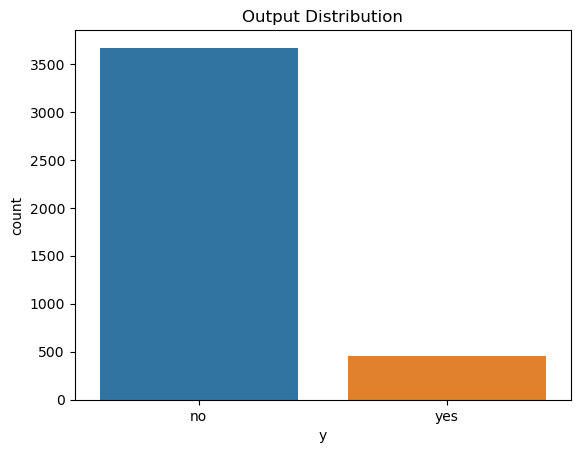

In [7]:
# displaying the distribution of target variable "y"
sns.countplot(x = data["y"])
plt.title("Output Distribution")
plt.show()

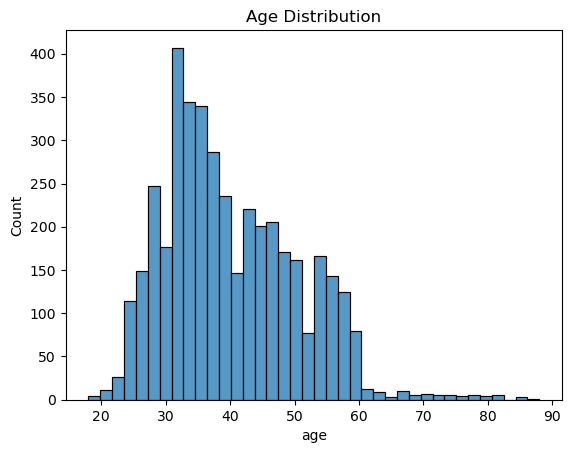

In [8]:
sns.histplot(x = data["age"])
plt.title("Age Distribution")
plt.show()

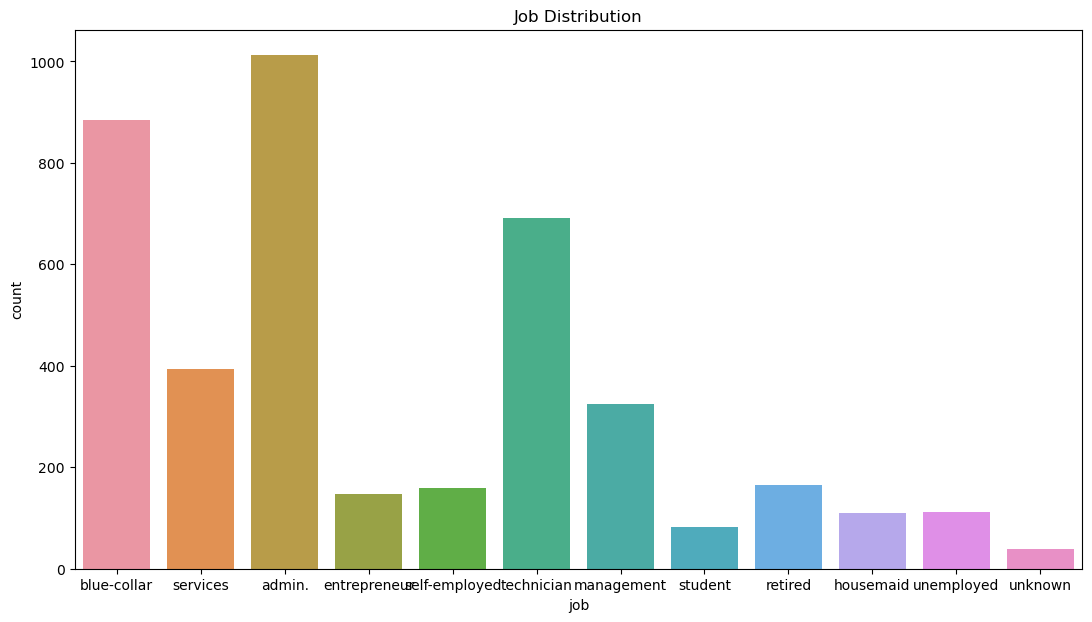

In [9]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["job"])
plt.title("Job Distribution")
plt.show()

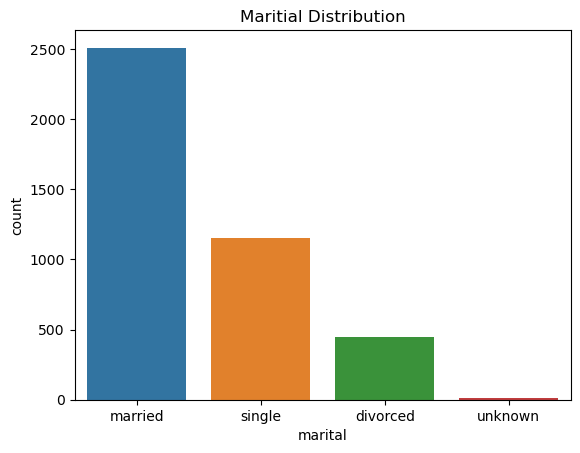

In [10]:
sns.countplot(x = data["marital"])
plt.title("Maritial Distribution")
plt.show()

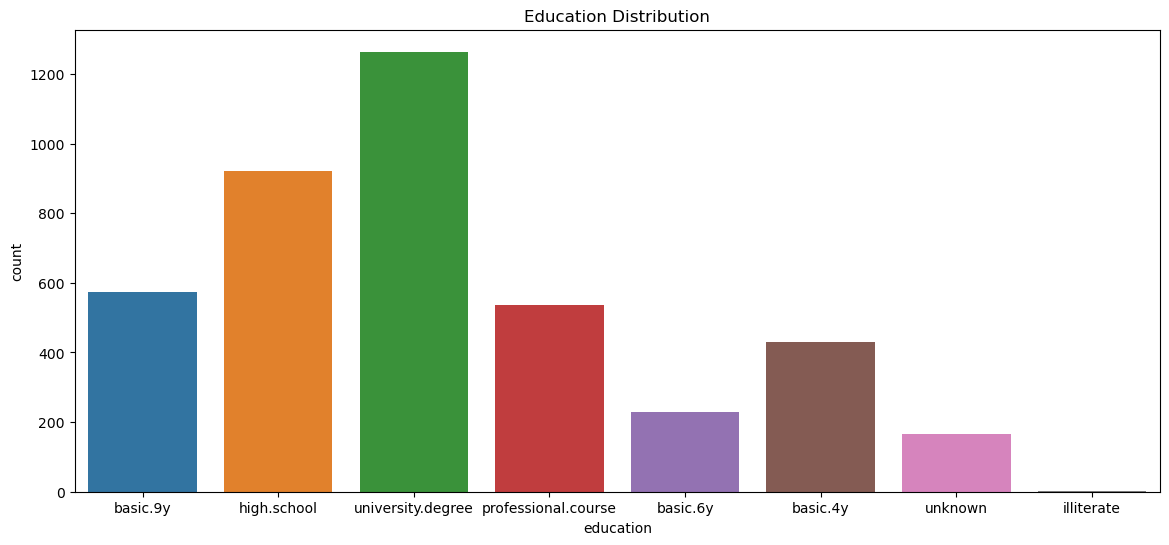

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(x = data["education"])
plt.title("Education Distribution")
plt.show()

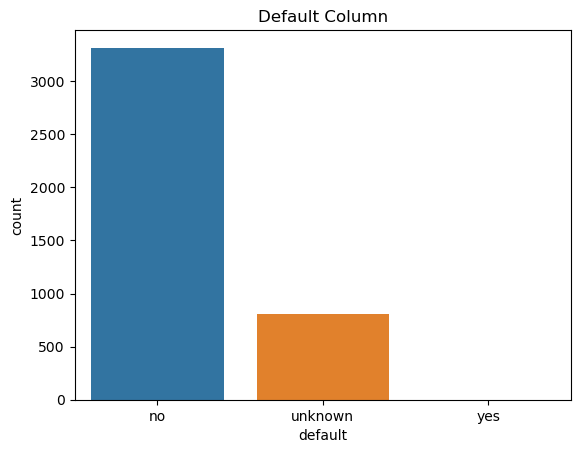

In [12]:
sns.countplot(x = data["default"])
plt.title("Default Column")
plt.show()

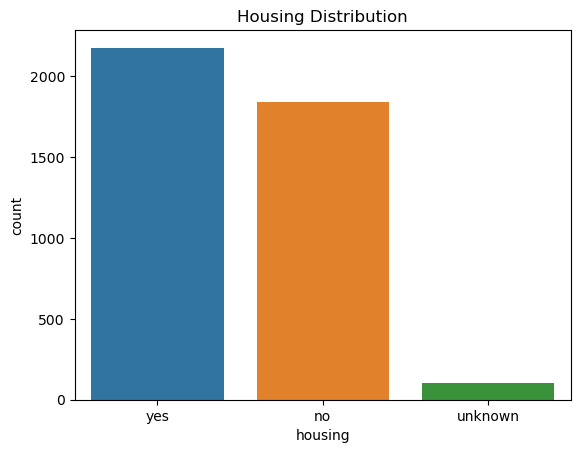

In [13]:
sns.countplot(x = data["housing"])
plt.title("Housing Distribution")
plt.show()

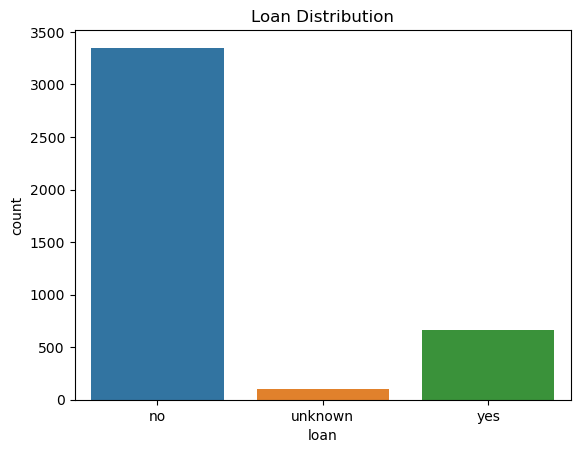

In [14]:
sns.countplot(x = data["loan"])
plt.title("Loan Distribution")
plt.show()

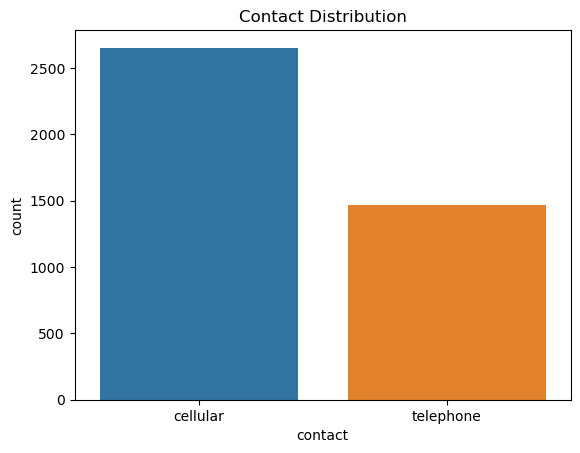

In [15]:
sns.countplot(x = data["contact"])
plt.title("Contact Distribution")
plt.show()

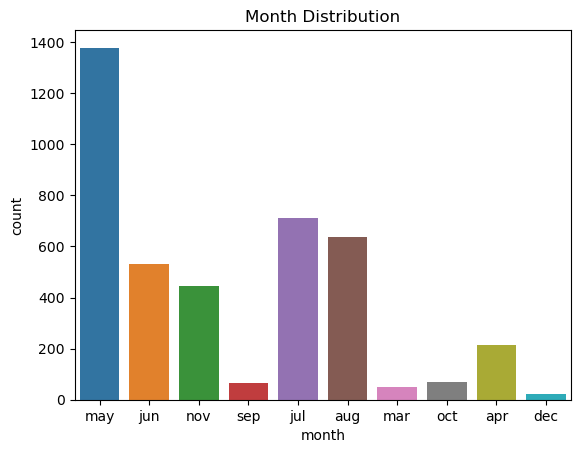

In [16]:
sns.countplot(x = data["month"])
plt.title("Month Distribution")
plt.show()

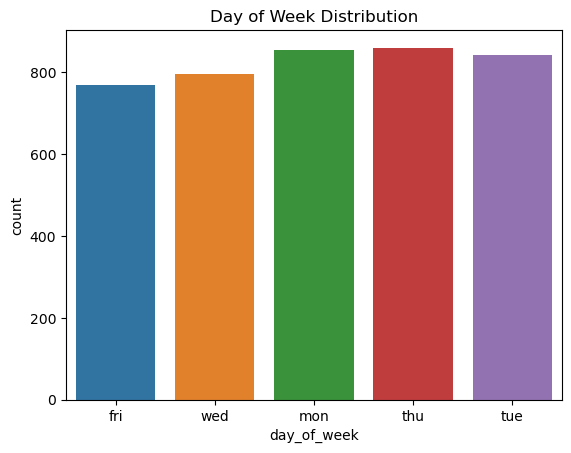

In [17]:
sns.countplot(x = data["day_of_week"])
plt.title("Day of Week Distribution")
plt.show()

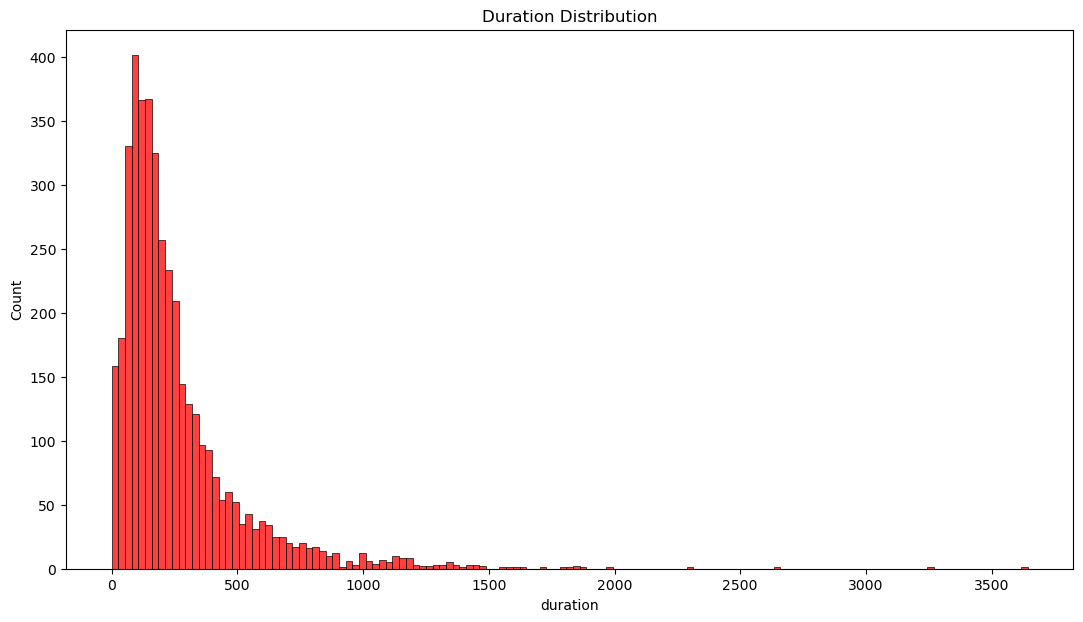

In [18]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["duration"], color = "r")
plt.title("Duration Distribution")
plt.show()

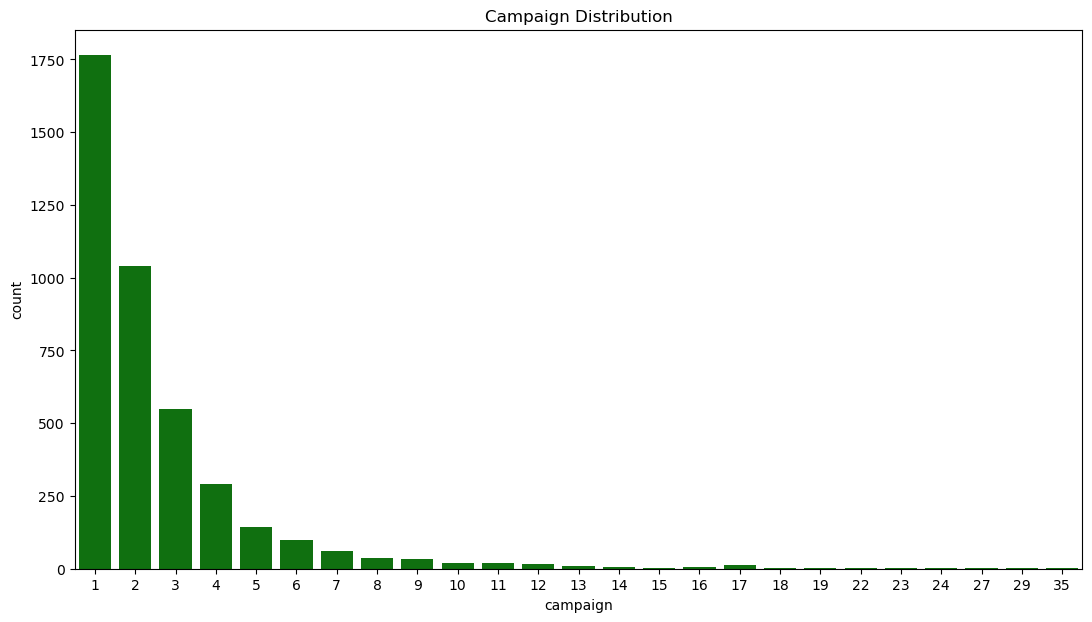

In [19]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["campaign"], color = "g")
plt.title("Campaign Distribution")
plt.show()

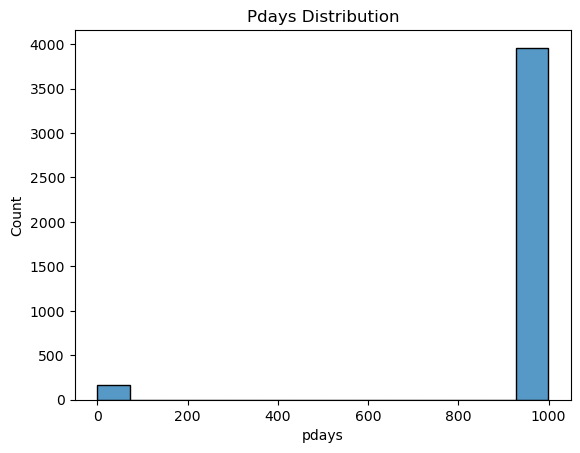

In [20]:
sns.histplot(x = data["pdays"])
plt.title("Pdays Distribution")
plt.show()

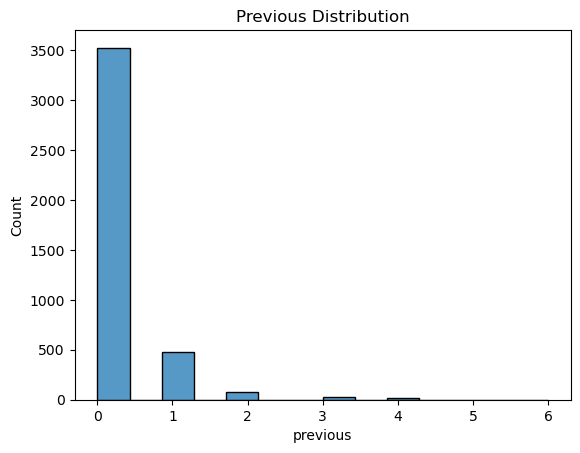

In [21]:
sns.histplot(x = data["previous"])
plt.title("Previous Distribution")
plt.show()

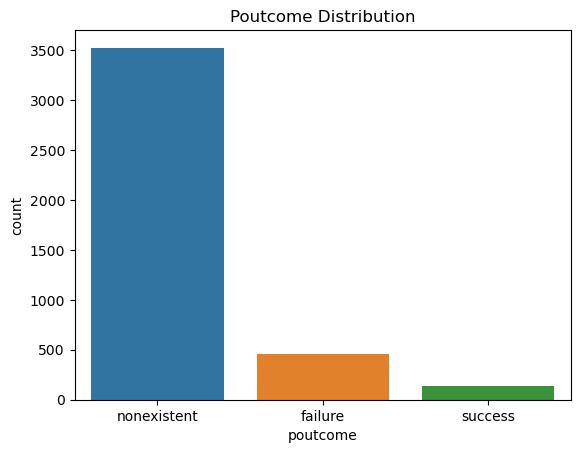

In [22]:
sns.countplot(x = data["poutcome"])
plt.title("Poutcome Distribution")
plt.show()

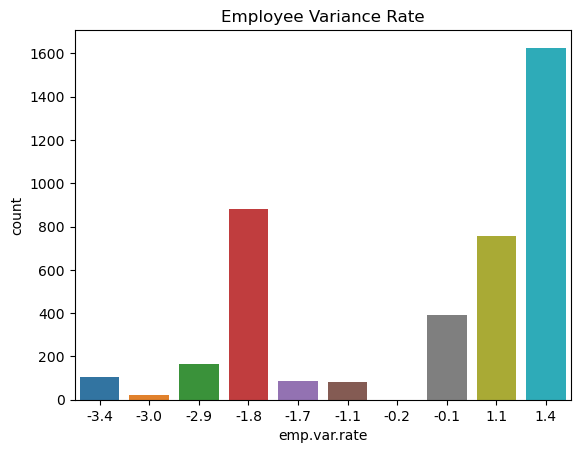

In [23]:
sns.countplot(x = data["emp.var.rate"])
plt.title("Employee Variance Rate")
plt.show()

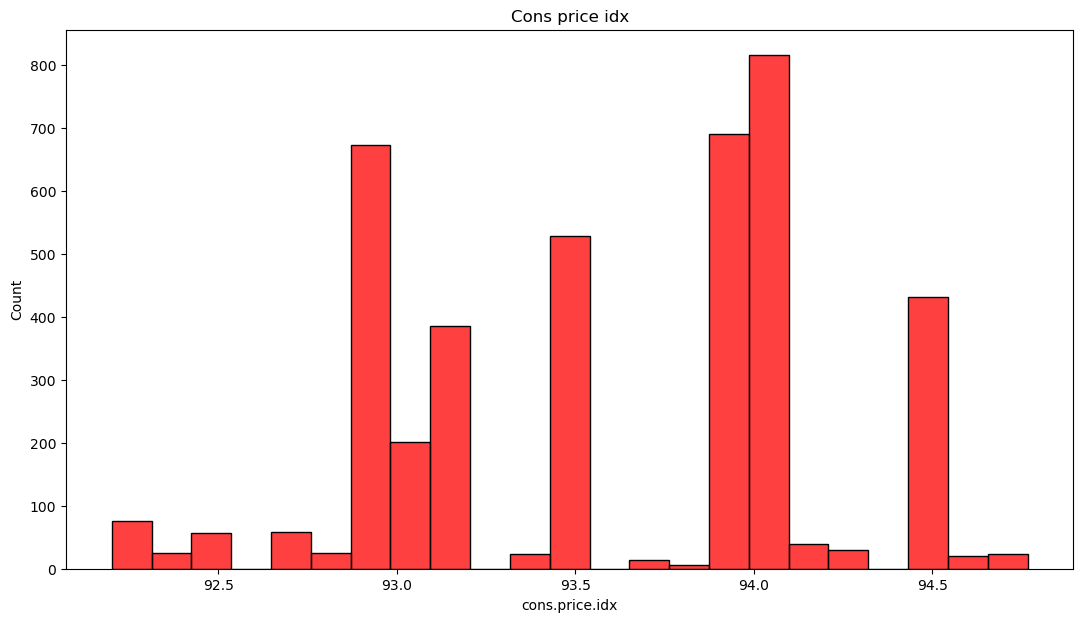

In [24]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.price.idx"], color = "r")
plt.title("Cons price idx")
plt.show()

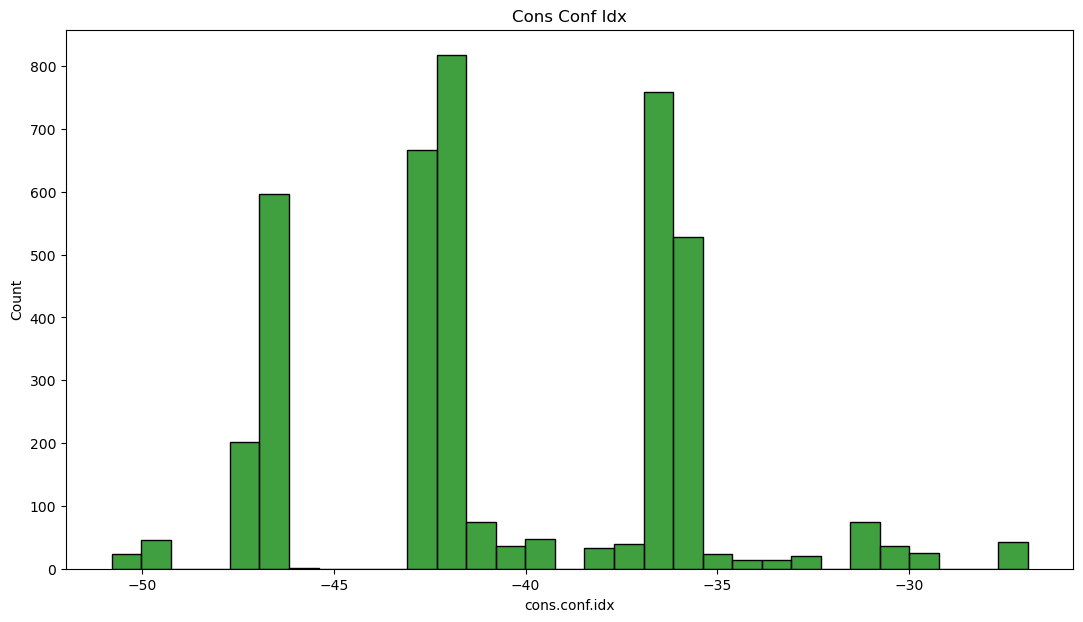

In [25]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.conf.idx"], color = "g")
plt.title("Cons Conf Idx")
plt.show()

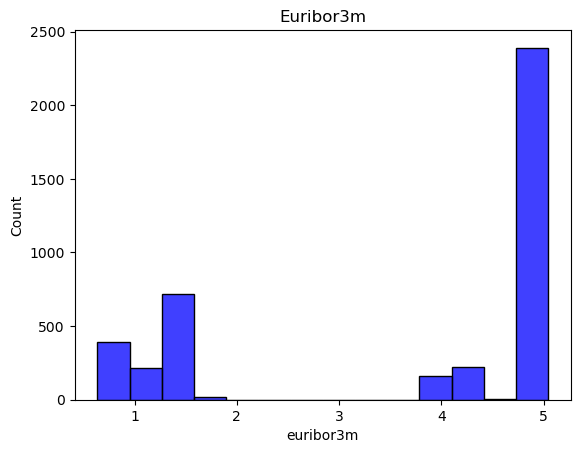

In [26]:
sns.histplot(x = data["euribor3m"], color = "b")
plt.title("Euribor3m")
plt.show()

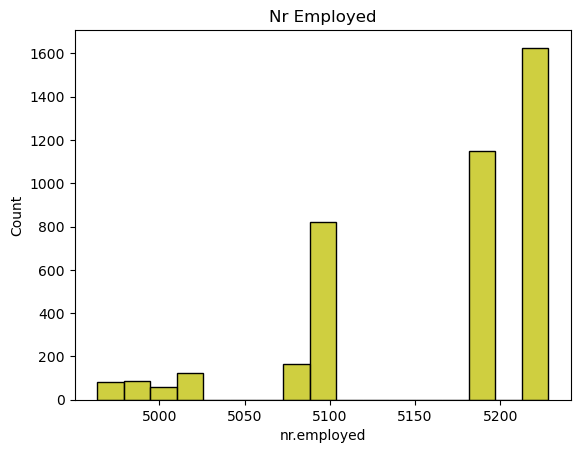

In [27]:
sns.histplot(x = data["nr.employed"], color = "y")
plt.title("Nr Employed")
plt.show()

## Preprocessing the dataset

In [7]:
# check for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# check for duplicate values
data.duplicated().any()

False

In [9]:
# dropping the duplicate values
dups = data.duplicated()
data.drop_duplicates(inplace=True)
# reset indices after dropping rows
data=data.reset_index(drop=True)

# check after dropping the duplicate values
data.duplicated().any()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    data.loc[data[column] > upper_limit, column] = upper_limit

In [11]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [12]:
# applying logarithmic data transformation to reduce the skewness in some columns

# age, campaign and previous are applied log transformation
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation
columns = ['age', 'duration', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(data[columns])
data['age'] = to_right_skewed[:, 0]
data['duration'] = to_right_skewed[:, 1]
data['campaign'] = to_right_skewed[:, 2]
data['previous'] = to_right_skewed[:, 3]

# nr_employed is applied x² transformation
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(data[columns])
data['nr.employed'] = to_left_skewed[:, 0]

In [13]:
# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.015820,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0
1,0.015442,7,2,3,0,0,0,1,6,0,...,1.238303,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,-0.954520,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.704287,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0
4,0.766684,0,1,6,0,2,0,0,7,1,...,-0.954520,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0


## Adding New Features

In [14]:
data['totalLoan'] = data['loan'] + data['housing']
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0,2
1,0.015442,7,2,3,0,0,0,1,6,0,...,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0,2
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0,2
4,0.766684,0,1,6,0,2,0,0,7,1,...,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0,2


## Coorelation Matrix

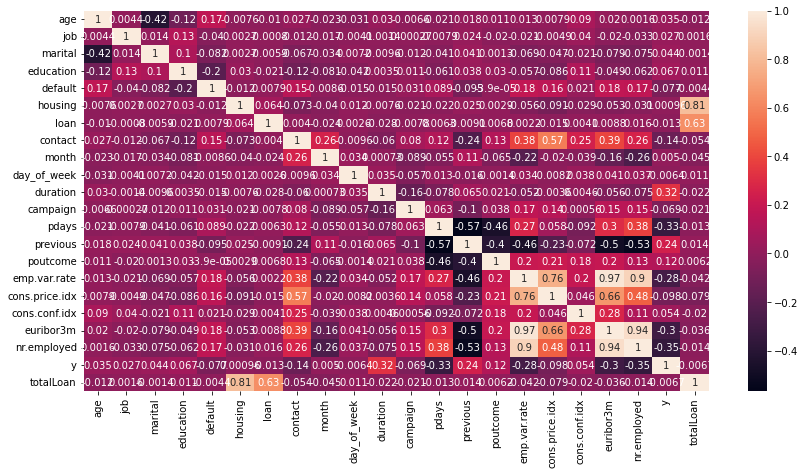

In [15]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)
plt.show()

## Input Split

In [16]:
X = data.drop(["y"], axis = 1)
y = data["y"]

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0,2
1,0.015442,7,2,3,0,0,0,1,6,0,...,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0,2
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0,2
4,0.766684,0,1,6,0,2,0,0,7,1,...,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0,2


## Model Selection

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [19]:
# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create  Dictionary for storing importance and names
    data={'features':feature_names,'importance':feature_importance}
    f_d = pd.DataFrame(data)

    # Sort by feature importance
    f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    # Modify plot options
    plt.figure(figsize=(10,8))

    sns.barplot(x=f_d['importance'], y=f_d['features'])

    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

In [22]:
# Oversampling the "yes" samples
#!pip install imblearn
from imblearn.over_sampling import SMOTE

# Since there are very less "yes" samples, the model is tended to predict the result as "no".
# This results in a very low recall rate. SMOTE is used to increase the number of "yes" samples thus to increase recall rate.
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8911508581752484
Test score: 0.9037220843672455
Model Score: 0.8398058252427184

RMSE: 0.40024264485094735


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),LogisticRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8911510483525887
Test score: 0.9037253493535327
Model Score: 0.8398058252427184

RMSE: 0.40024264485094735


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(C=c_values)

grid = GridSearchCV(LogisticRegression( max_iter=1000000), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'C': 100}


In [46]:
model = make_pipeline(StandardScaler(),LogisticRegression(C=100))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.892126467931346
Test score: 0.9004864829567716
Model Score: 0.8406148867313916

RMSE: 0.39923065171478056


### Ridge Classifier

In [47]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [48]:
model = make_pipeline(StandardScaler(), RidgeClassifier())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [49]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = np.geomspace(100, 0.01, 5)

param_grid = dict(solver=solvers,alpha=alpha)

grid = GridSearchCV(RidgeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'alpha': 0.1, 'solver': 'auto'}


In [50]:
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha = 0.1))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8823717016117529
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9092968192839823
Test score: 0.8818793261068304
Model Score: 0.8640776699029126

RMSE: 0.3686764572048063


In [52]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 350, 'min_samples_split': 2}


In [67]:
model = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 350, min_samples_split = 2 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9085157609470832
Test score: 0.8810728744939272
Model Score: 0.8551779935275081

RMSE: 0.38055486657312887


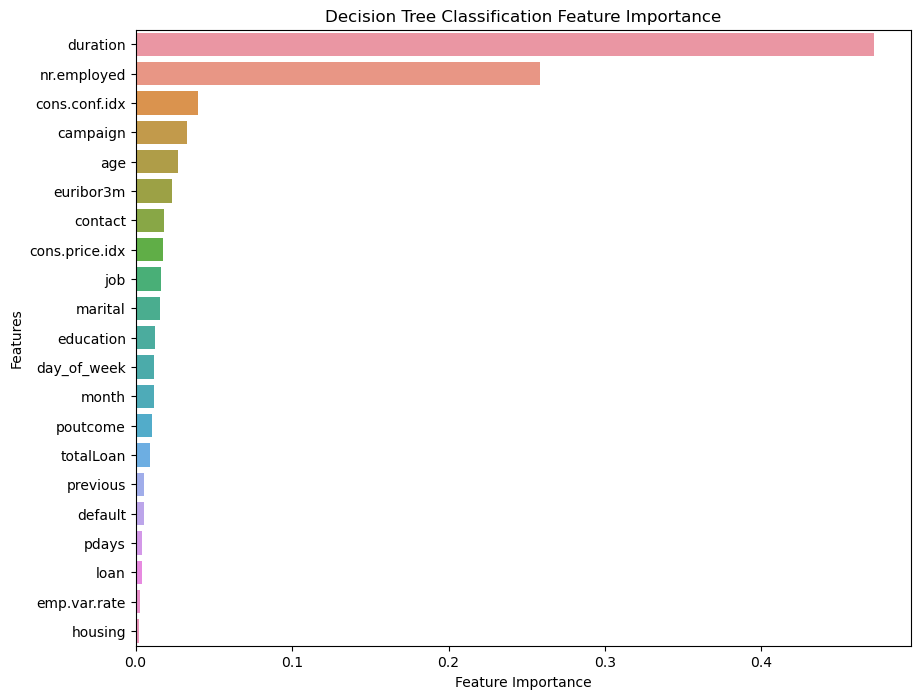

In [54]:
plot_feature_importance(model.feature_importances_,X.columns,'Decision Tree Classification ')

### Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9453862026339561
Test score: 0.9004897479430586
Model Score: 0.88915857605178

RMSE: 0.33292855682296174


In [56]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 300, 'min_samples_split': 3}


In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = 300, min_samples_split = 3)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9447996957162553
Test score: 0.9037253493535327
Model Score: 0.8923948220064725

RMSE: 0.32803228193811584


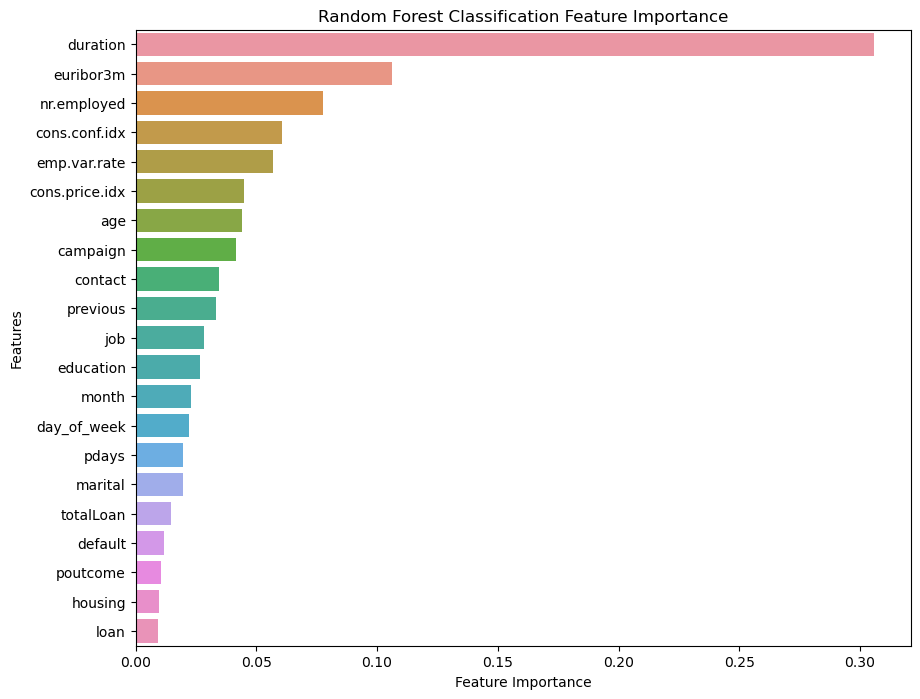

In [57]:
plot_feature_importance(model.feature_importances_,X.columns,'Random Forest Classification ')

### XGBoost Classification

In [59]:
#!pip install xgboost

In [58]:
from xgboost import XGBClassifier  

model = XGBClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9387628964008938
Test score: 0.8948347916938749
Model Score: 0.8996763754045307

RMSE: 0.3167390481065908


In [59]:
param_grid = {"max_depth":range(3,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 9}


In [60]:
from xgboost import XGBClassifier  

model = XGBClassifier(max_depth = 9)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9416866828317406
Test score: 0.8915959252971138
Model Score: 0.8859223300970874

RMSE: 0.33775385993784385


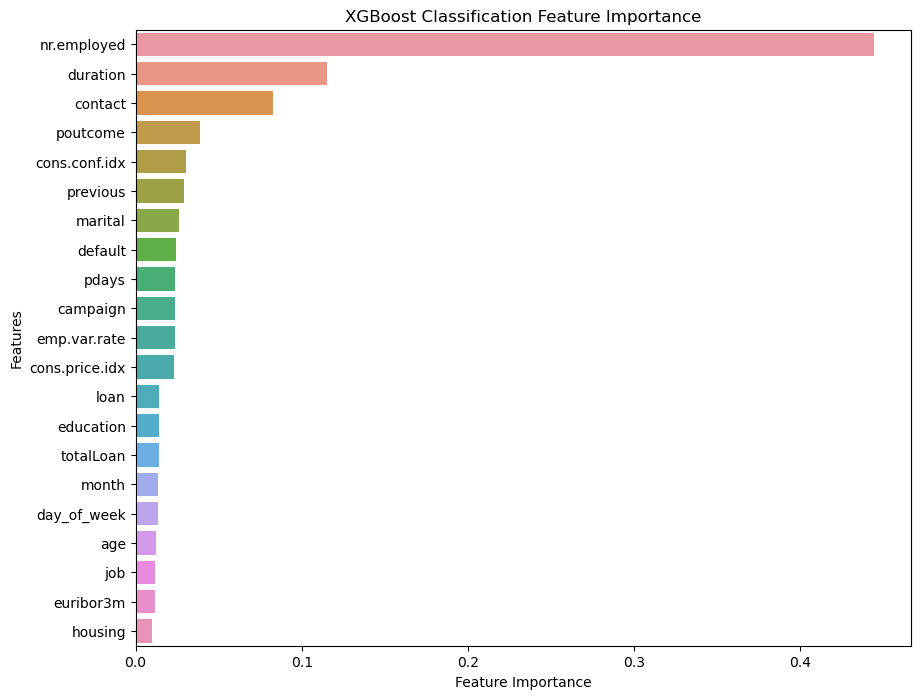

In [61]:
plot_feature_importance(model.feature_importances_,X.columns,'XGBoost Classification ')

### LightGBM

In [64]:
# !pip install lightgbm

In [62]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9336916274425903
Test score: 0.8964542248922556
Model Score: 0.8956310679611651

RMSE: 0.3230618083878609


In [63]:
param_grid = {"num_leaves":range(100,700, 100) }

grid = GridSearchCV(LGBMClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'num_leaves': 200}


In [23]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves = 200)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9453911472448058
Test score: 0.9005028078882068
Model Score: 0.901294498381877

RMSE: 0.3141743172478027


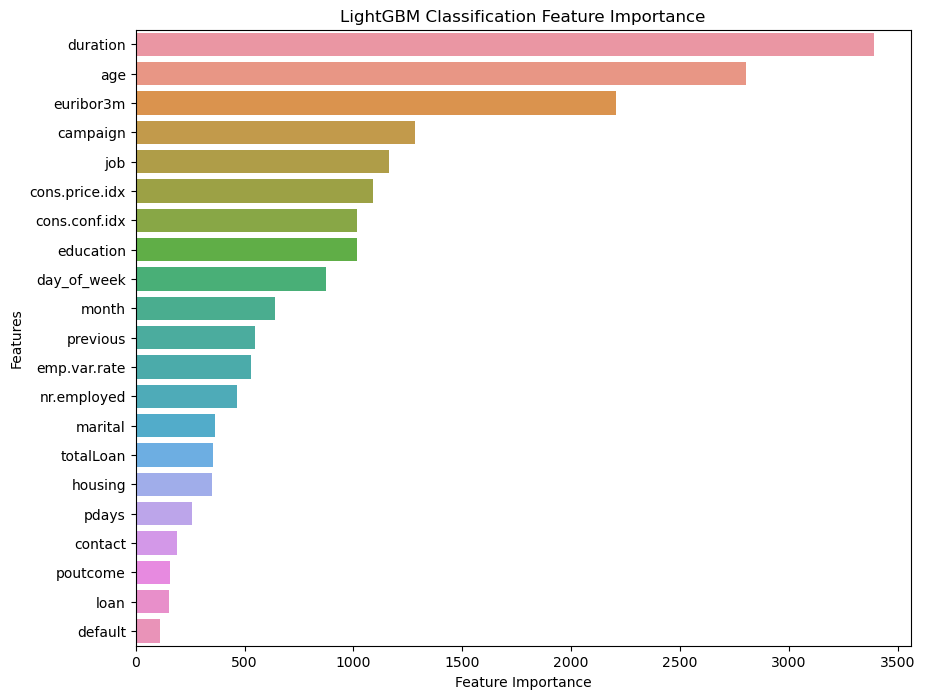

In [65]:
plot_feature_importance(model.feature_importances_,X.columns,'LightGBM Classification ')

In [66]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_p).ravel()

print("TP: " + str(tp))
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("")

recall = tp / (tp + fn) * 100
precision = tp / (tp + fp) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 75
TN: 1039
FP: 66
FN: 56

Recall: 57.25190839694656 %
Precision: 53.191489361702125 %


In [24]:
import pickle

pickle.dump(model, open("lgb_model.sav", 'wb'))